<h1>Import libraries<h1>

In [1]:
from Model.Gradient_Boosting_Classifier_from_scratch import *
from Model.Gradient_Boosting_Regressor_from_scratch import *
from Model.Gradient_Boosting_optimization_pre_pruning import *
from Model.Gradient_Boosting_optimization_post_pruning import *
from Metrics.Classification_metrics import *
from Metrics.Regression_metrics import *
from Plots.Prediction_plots import *
Plots_predictions = Prediction_plots()

<h1>Explanation of Gradient Boosting<h1>

$\text{Gradient Boosting is an algorithm that can be used for both regression and classification problems.}$<p>
$\text{In this case, boosting involves determining subsequent predictions taking into account the errors of preceding estimators.}$

<h2>Construction of Gradient Boosting<h2>

$\text{The following scheme has been generalized to apply to both the regression and classification problem.}$<p>
$\text{However, there are some differences between the two approaches, so there will also be longer notes when discussing the scheme.}$<p><br>

$\text{In the case of classification, there is additionally a breakdown of the target variable using OneHotEncoding}$<p>
$\text{and making predictions separately for each class (similar to logistic regression).}$<p><br>
$1. \text{ Determining } T \text{ - the number of estimators.}$<p><br>
$2. \text{ Defining the initial prediction that minimizes the loss function (in a later section a explained for both regression and classification):}$
$$Estimator_0\left(X\right)=\operatorname*{arg\,min}_k \ L\left(y,pred\right)$$
$\text{Where: } pred \text{ - const.}$<p><br>
$3. for \ t=1 \ to \ T:$<p>
$a) \text{ If } t\neq1 \text{: Determination of errors for } Estimator_t:$
$$\varepsilon_{t,i}=-\left[\frac{\partial L\left(y_i,Estimator_{t-1}\left(X_i\right)\right)}{\partial Estimato r_{t-1}\left(X_i\right)}\right]$$
$\text{Where: } L\left(y_i,Estimator_{t-1}\left(X_i\right)\right) \text{ - loss function,}$<p>
$Estimator_{t-1}\left(X_i\right) \text{ – prediction returned by estimator } t-1 \text{ for observation } i.$<p>
$\text{If } t=1: \ \varepsilon_{t,i}=y_i-Estimator_0\left(X_i\right).$<p><br>
$b) \text{ Training the estimator: } Estimator_t \text{ with } \varepsilon_t \text{ as the target variable.}$<p><br>
$c) \text{ Initial prediction: } {Estimator}_t\left(X\right)_{init}.$<p><br>
$d) \text{ Calculation of the } \gamma \text{ value minimizing the loss functions:}$
$$\gamma_t=\operatorname*{arg\,min}_\gamma L\left(y,{Estimator}_t\left(X\right)+\gamma\right)$$
$\text{A different } \gamma \text{ value is evaluated for each } leaf\_node \text{ in the tree (actually "updated" because there are currently predictions for } \varepsilon_t).$<p>
$\text{Thanks to this, each prediction is updated } \textbf{individually} \text{ in such a way as to minimize leaf loss functions.}$<p>
$\text{The important thing here is that we include the real } y \text{ values } \textbf{directly} \text{, which our original estimators in Gradient Boosting doesn't do by taking } \varepsilon_t \text{ as the response variable.}$<p>
$e) \ {Estimator}_t \text{ prediction update:}$
$${Estimator}_t\left(X\right)={Estimator}_t\left(X\right)_{init}+learning\_rate\times\gamma_t$$
$\text{Where: } learning\_rate \text{ - const.}$

<h2>Classification<h2>

$\text{Loss Function:}$
$$log\_loss=-\frac{1}{N}\times\sum_{i=1}^{N}{y_i\times\ln({\hat{p}}_i)+\left(1-y_i\right)\times\ln(1-{\hat{p}}_i)}$$
$\text{Where: } N \text{ - number of observations,}$<p>
$y_i \text{ – value of the dependent variable for observation } i,$<p>
${\hat{p}}_i \text{ – the probability of a class that is equivalent to } y_i.$<p>
$\text{However, to find the probability: } \hat{p}\ \text{ we first need to know the value of } \hat{y}.$<p>
$\text{In the case of Gradient Boosting, each prediction is equivalent to the log\_odds.}$<p>
$\text{The conversion of } log\_odds \text{ into probability is given by the following formula:}$<p>
$${\hat{p}}_i=\frac{1}{1+e^{-log\_odds}}=\frac{1}{1+e^{-{\hat{y}}_i}}$$
$\text{Now let's transform the loss functions:}$
$$log{\_loss}=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left({\hat{p}}_i\right)}+\ln{\left(1-{\hat{p}}_i\right)}-y_i\times\ln{\left(1-{\hat{p}}_i\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left({\hat{p}}_i\right)}-\ln{\left(1-{\hat{p}}_i\right)}\right)+\ln{\left(1-{\hat{p}}_i\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left(\frac{1}{1+e^{-{\hat{y}}_i}}\right)}-\ln{\left(1-\frac{1}{1+e^{-{\hat{y}}_i}}\right)}\right)+\ln{\left(1-\frac{1}{1+e^{-{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left(\frac{1}{1+e^{-{\hat{y}}_i}}\right)}-\ln{\left(\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}\right)}\right)+\ln{\left(\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left(\frac{\frac{1}{1+e^{-{\hat{y}}_i}}}{\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}}\right)}+\ln{\left(\frac{1}{1+e^{{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left(\frac{1}{e^{-{\hat{y}}_i}}\right)}-\ln{\left(1+e^{{\hat{y}}_i}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times{\hat{y}}_i-\ln{\left(1+e^{{\hat{y}}_i}\right)}\right)$$
$\text{Important thing to note is that Gradient Boosting uses DecisionTreeRegressors as estimators.}$<p>
$\text{The prediction is in terms of } log\_odds \text{ which is a continous value, that's why we use Regression algorithm in classification task.}$<p><br>
$\text{Initial value: }$
$$\frac{\partial l o g{\_loss}\left(y,pred\right)}{\partial pred}=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-\frac{e^{pred}}{1+e^{pred}}\right)=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-\frac{1}{1+e^{-pred}}\right)=0$$
$\text{For simplicity, let's make the substitution:}$
$$\frac{1}{1+e^{-pred}}\rightarrow prob$$
$$\frac{\partial l o g{\_loss}\left(y,pred\right)}{\partial pred}=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-prob\right)=0\leftrightarrow prob=\frac{\sum_{i\in k l a s a} y_i}{\sum_{i=1}^{N}y_i}$$
$\text{Where: } class \text{ – currently considered class.}$<p>
$\text{Then, we need to convert back to pred, so:}$
$$\frac{1}{1+e^{-pred}}=\frac{\sum_{i\in class} y_i}{\sum_{i=1}^{N}y_i}\leftrightarrow pred=-\ln{\left(\frac{1-\frac{\sum_{i\in class} y_i}{\sum_{i=1}^{N}y_i}}{\frac{\sum_{i\in class} y_i}{\sum_{i=1}^{N}y_i}}\right)}=-\ln{\left(\frac{\sum_{i=1}^{N}y_i-\sum_{i\in class} y_i}{\sum_{i\in class} y_i}\right)}$$
$\text{Error of estimator:}$
$$\varepsilon_{t,i}=-\left[\frac{\partial log\_loss\left(y_i,{\hat{y}}_i\right)}{\partial{\hat{y}}_i}\right]=y_i-\frac{1}{1+e^{-{\hat{y}}_i}}$$
$\gamma \text{ value:}$
$$log\_loss\left(y,\hat{y}+\gamma\right)=-\frac{1}{N}\times\sum_{i=1}^{N}{y_i\times\ln(\frac{1}{1+e^{-{\hat{y}}_i+\gamma}})+\left(1-y_i\right)\times\ln(\frac{e^{-{\hat{y}}_i+\gamma}}{1+e^{-{\hat{y}}_i+\gamma}})}$$
$\text{Determining the optimal } \gamma \text{ value from the above equation would involve a lot of computation.}$<p>
$\text{We therefore use the } \textbf{Second Order Taylor Approximation:}$
$$L\left(y,\hat{y}+\gamma\right)\approx L\left(y,\hat{y}\right)+\frac{\partial}{\partial\hat{y}}\left(L\left(y,\hat{y}\right)\right)\times\gamma+\frac{1}{2}\times\frac{\partial^2}{\partial{\hat{y}}^2}\left(L\left(y,\hat{y}\right)\right)\times\gamma^2$$
$\text{Thus, the derivative of the loss function over } \gamma \text{ is:}$
$$\frac{\partial L}{\partial\gamma}\left(L\left(y,\hat{y}+\gamma\right)\right)=\frac{\partial}{\partial\hat{y}}\left(L\left(y,\hat{y}\right)\right)+\frac{\partial^2}{\partial{\hat{y}}^2}\left(L\left(y,\hat{y}\right)\right)\times\gamma=0$$
$$\gamma=-\frac{\frac{\partial}{\partial\hat{y}}\left(L\left(y,\hat{y}\right)\right)}{\frac{\partial^2}{\partial{\hat{y}}^2}\left(L\left(y,\hat{y}\right)\right)}$$
$$\frac{\partial}{\partial\hat{y}}\left(log\_loss\left(y,\hat{y}\right)\right)=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-\frac{1}{1+e^{-{\hat{y}}_i}}\right)$$
$$\frac{\partial^2}{\partial{\hat{y}}^2}\left(log\_loss\left(y,\hat{y}\right)\right)=-\frac{1}{N}\times\sum_{i=1}^{N}\left(-\frac{1}{1+e^{-{\hat{y}}_i}}\times\frac{1}{1+e^{{\hat{y}}_i}}\right)$$
$\text{Thus:}$
$$\gamma=-\frac{\frac{\partial}{\partial\hat{y}}\left(L\left(y,\hat{y}\right)\right)}{\frac{\partial^2}{\partial{\hat{y}}^2}\left(L\left(y,\hat{y}\right)\right)}=\sum_{i=1}^{N}\frac{\left(y_i-\frac{1}{1+e^{-{\hat{y}}_i}}\right)}{\left(\frac{1}{1+e^{-{\hat{y}}_i}}\times\frac{1}{1+e^{{\hat{y}}_i}}\right)}$$

<h2>Prediction<h2>

$\text{For classification, the prediction (as well as the procedure) is determined in a similar way as in logistic regression}$<p>
$\text{For each class, we determine the probability using the formula:}$
$$Prediction_k=Estimator_0\left(X\right)+\sum_{i=1}^{N}\left(learning\_rate\times{Estimator}_{t,k}\left(X\right)\right)$$
$$p_{k,i}=\frac{e^{Prediction_k}}{1+\sum_{k=1}^{K-1}e^{Prediction_k}}$$
$$p_{0,i}=\frac{1}{1+\sum_{k=1}^{K-1}e^{Prediction_k}}$$
$\text{Where: } K \text{ - number of classes in the dataset,}$<p>
${Estimator}_{t,k}\left(X\right) \text{ – prediction of the } t \text{ estimator for class } k.$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/bank-balanced.csv")
X = data.drop("deposit", axis=1)
y = data["deposit"]

In [3]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 11162


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h2>Check for null data<h2>

In [4]:
data.isnull().sum()/len(data)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<h2>Convert object to numeric<h2>

$\text{For Gradient Boosting we have to convert object/string features to numeric.}$<p>
$\text{For Gradient Boosting, the best option would be to use OridinalEncoding instead of OneHotEncoding because of that algorithm's problem with the curse of dimensionality}$

In [5]:
list_of_object_features_classification = data.select_dtypes(include="object").columns.tolist()
list_of_numeric_features_classification = data.select_dtypes(exclude="object").columns.tolist()
encoder = OrdinalEncoder()
data[list_of_object_features_classification] = encoder.fit_transform(data[list_of_object_features_classification])

<h2>Divide our data into train and test sets<h2>

In [6]:
target_binary = "deposit"
X = data.drop(target_binary, axis=1)
y = data[[target_binary]]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

$\text{The huge advantage of Gradient Boosting compared to other popular algorithms is that there is no need to scale the data.}$

<h1>Modelling<h1>

$\text{To verify how well our algorithms are able to perform, a cross-validation will be used on the training set (in order to average the results obtained).}$<p>
$\text{Then we will check whether the algorithms will perform equally well (or even better) on the test data.}$

In [7]:
class Cross_Validation():
    def __init__(self, metric, algorithm_instance, cross_validation_instance):
        metrics = {"accuracy": [lambda y, y_pred: accuracy_score(y, y_pred), "preds"],
                    "roc_auc": [lambda y, y_pred: roc_auc_score(y, y_pred), "probs"],
                    "mse": [lambda y, y_pred: mean_squared_error(y, y_pred), "preds"],
                    "rmse": [lambda y, y_pred: mean_squared_error(y, y_pred)**0.5, "preds"],
                    "mae": [lambda y, y_pred: mean_absolute_error(y, y_pred), "preds"]}
        if metric not in metrics:
            raise ValueError('Unsupported metric: {}'.format(metric))
        self.eval_metric = metrics[metric][0]
        self.metric_type = metrics[metric][1]
        self.algorithm = algorithm_instance
        self.cv = cross_validation_instance
    
    def fit(self, X, y, verbose=False):
        X = self.check_X(X=X)
        y = self.check_y(y=y)
        self.train_scores, self.valid_scores = [], []
        for iter, (train_idx, valid_idx) in enumerate(self.cv.split(X, y)):
            X_train, X_valid = X[train_idx, :], X[valid_idx, :]
            y_train, y_valid = y[train_idx], y[valid_idx]
            self.algorithm.fit(X_train, y_train)
            if(self.metric_type == "preds"):
                y_train_pred = self.algorithm.predict(X_train)
                y_valid_pred = self.algorithm.predict(X_valid)
            else:
                y_train_pred = self.algorithm.predict_proba(X_train)[:, 1]
                y_valid_pred = self.algorithm.predict_proba(X_valid)[:, 1]
            self.train_scores.append(self.eval_metric(y_train, y_train_pred))
            self.valid_scores.append(self.eval_metric(y_valid, y_valid_pred))
            if(verbose == True):
                print("Iter {}: train scores: {}; valid scores: {}".format(iter, np.round(self.eval_metric(y_train, y_train_pred), 5), np.round(self.eval_metric(y_valid, y_valid_pred), 5)))
        return np.mean(self.train_scores), np.mean(self.valid_scores)
    
    def check_X(self, X):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, np.ndarray) and not torch.is_tensor(X):
            raise TypeError('Wrong type of X. It should be dataframe, numpy array or torch tensor.')
        X = np.array(X)
        if(X.ndim == 1):
            X = X[None, :]
        return X
    
    def check_y(self, y):
        if not isinstance(y, pd.DataFrame) and not isinstance(y, pd.Series) and not isinstance(y, np.ndarray) and not torch.is_tensor(y):
            raise TypeError('Wrong type of y. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        y = np.array(y)
        if(y.ndim == 2):
            y = y.squeeze()
        return y

In [8]:
model = Gradient_Boosting_Classifier(n_estimators=50, learning_rate=0.5, loss="log_loss", criterion="squared_error", max_depth=3, random_state=17)
CV = Cross_Validation(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=True)
print("Mean of train scores: {}; Mean of valid scores: {}".format(np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Iter 0: train scores: 0.95203; valid scores: 0.92021
Iter 1: train scores: 0.95535; valid scores: 0.92398
Iter 2: train scores: 0.95406; valid scores: 0.92138
Iter 3: train scores: 0.95478; valid scores: 0.90593
Iter 4: train scores: 0.953; valid scores: 0.91987
Mean of train scores: 0.95384; Mean of valid scores: 0.91827


$\text{As we can see our algorithm performs quite well on training and validation dataset.}$

$\text{Check the results for original test dataset.}$

In [9]:
model = Gradient_Boosting_Classifier(n_estimators=50, learning_rate=0.5, loss="log_loss", criterion="squared_error", max_depth=3, random_state=17)
model.fit(X_train, y_train)
y_prob_train = model.predict_proba(X_train)[:,1]
y_prob_test = model.predict_proba(X_test)[:,1]
print("Gradient Boosting Classifier: Train: {}; Test: {}".format(np.round(roc_auc_score(y_train, y_prob_train), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

Gradient Boosting Classifier: Train: 0.9502; Test: 0.9193


$\text{Write down predictions for the future}$

In [10]:
base_predictions = model.predict(X_test)
base_probabilities = model.predict_proba(X_test)[:, 1]

$\text{We will try to tune hyperparameters to see whether we can improve accuracy.}$<p>
$\text{To perform optimization we will use sklearn Gradient Boosting just because of faster compilation time.}$

<h1>Optimization<h1>

$\textbf{Pruning } \text{ - pruning out nodes to stop over-fitting. Sometimes with a large number of variables and a small dataset,}$<p>
$\text{you may find that the final splits result in leaves containing only a few observations.}$<p>
$\text{While this will allow you to make a prediction on the training set with great accuracy,}$<p>
$\text{the variance of the tree is very large (a small change in the data contributes to a change in the prediction).}$<p><br>

$\text{We divide pruning into a phases:}$<p>
$\textbf{Pre-Pruning: } \text{find optimal values for parameters like: } criterion \text{, } max\_depth \text{, } min\_samples\_split \text{, } max\_features.$<p>
$\text{The best way to find them is by using cross validation.}$<p><br>

$\textbf{Post-Pruning: } \text{after building whole tree we will try to prune it a bit by removing some leaves.}$<p>
$\text{This type of pruning is parameterized by Cost Complexity Parameter: } ccp\_alpha.$

$$Tree\ Score=sum(Error)+\alpha\times leaves$$

$\text{Where: } sum(Error) \text{- the sum value of the loss (for regression it can be MSE, and for classification Entropy, or Gini),}$<p>
$leaves \text{ - the number of leaves in the tree.}$<p>
$\text{The tree of optimal size will be the one for which } Tree\_Score \text{ takes the } \textbf{smallest } \text{value.}$<p>
$\text{The value of } \alpha \text{ will be different for different datasets.}$

<h3>Pre-Pruning<h3>

$\text{Let's start tuning with } n\_estimators \text{ parameter.}$<p>
$n\_estimators \ [int] \text{: specifying the number of estimators used in building the gradient boosting.}$<p>
$\text{A larger number of trees reduces the likelihood of overfitting (better averaging/more models considered for voting)}$<p>
$\text{On the other hand, larger number of estimators leads to more models to train, i.e. longer compilation time.}$<p>
$\text{As a rule, a value of 50 should be sufficient, but an optimal value can be found through cross-validation.}$

In [11]:
model = GradientBoostingClassifier(random_state=17)
CV = Cross_Validation_Gradient_Boosting_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for n_estimators in range(10, 800, 50):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, n_estimators=n_estimators)
    print("n_estimators: {}; Mean of train scores: {}; Mean of valid scores: {}".format(n_estimators, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

n_estimators: 10; Mean of train scores: 0.88017; Mean of valid scores: 0.87474
n_estimators: 60; Mean of train scores: 0.92141; Mean of valid scores: 0.90683
n_estimators: 110; Mean of train scores: 0.93626; Mean of valid scores: 0.91505
n_estimators: 160; Mean of train scores: 0.94437; Mean of valid scores: 0.91862
n_estimators: 210; Mean of train scores: 0.95033; Mean of valid scores: 0.92039
n_estimators: 260; Mean of train scores: 0.95532; Mean of valid scores: 0.92184
n_estimators: 310; Mean of train scores: 0.95933; Mean of valid scores: 0.92215
n_estimators: 360; Mean of train scores: 0.96299; Mean of valid scores: 0.92241
n_estimators: 410; Mean of train scores: 0.96633; Mean of valid scores: 0.92274
n_estimators: 460; Mean of train scores: 0.96917; Mean of valid scores: 0.92276
n_estimators: 510; Mean of train scores: 0.97174; Mean of valid scores: 0.9229
n_estimators: 560; Mean of train scores: 0.97403; Mean of valid scores: 0.92253
n_estimators: 610; Mean of train scores: 0.

$\text{We see that as we increase the number of estimators in the Gradient Boosting, our algorithm gets better results.}$<p>
$\text{However, from the level of } n\_estimators=500 \text{ we can see a exacerbation, for this reason value of 500 will be used in further optimization.}$

$learning\_rate \ [float]: \text{ controls the loss function used for calculating the weight of the estimators.}$

In [12]:
model = GradientBoostingClassifier(random_state=17, n_estimators=500)
CV = Cross_Validation_Gradient_Boosting_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for learning_rate in np.linspace(0.01, 0.3, 10):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, learning_rate=learning_rate)
    print("learning_rate: {}; Mean of train scores: {}; Mean of valid scores: {}".format(learning_rate, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

learning_rate: 0.01; Mean of train scores: 0.91729; Mean of valid scores: 0.90432
learning_rate: 0.042222222222222223; Mean of train scores: 0.94995; Mean of valid scores: 0.91953
learning_rate: 0.07444444444444444; Mean of train scores: 0.96377; Mean of valid scores: 0.9225
learning_rate: 0.10666666666666666; Mean of train scores: 0.973; Mean of valid scores: 0.92277
learning_rate: 0.1388888888888889; Mean of train scores: 0.97984; Mean of valid scores: 0.92296
learning_rate: 0.1711111111111111; Mean of train scores: 0.98505; Mean of valid scores: 0.92116
learning_rate: 0.20333333333333334; Mean of train scores: 0.98889; Mean of valid scores: 0.92006
learning_rate: 0.23555555555555557; Mean of train scores: 0.99191; Mean of valid scores: 0.9196
learning_rate: 0.2677777777777778; Mean of train scores: 0.99417; Mean of valid scores: 0.91846
learning_rate: 0.3; Mean of train scores: 0.99557; Mean of valid scores: 0.91764


$\text{Best results are obtained for } learning\_rate=0.14$

$subsample \ [float]: \text{ fraction of samples to be used for fitting the individual estimator.}$<p>
$subsample=1 \text{ means that we are taking all samples into account while fitting estimator.}$<p>
$subsample<1 \text{ leads to a reduction of variance, but increase in bias.}$<p>
$\text{This parameter is kinda simmilar to bootstrap in Random Forest.}$<p>
$\text{However, subsample limits the number of samples, i.e. we will only train } sumbsample*N \text{ training samples.}$<p>
$\text{On the other hand, bootstrap makes us take copies of some observations, while there are still } N \text{ samples.}$

In [13]:
model = GradientBoostingClassifier(random_state=17, n_estimators=500, learning_rate=0.14)
CV = Cross_Validation_Gradient_Boosting_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for subsample in np.linspace(0.4, 1.0, 10):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, subsample=subsample)
    print("subsample: {}; Mean of train scores: {}; Mean of valid scores: {}".format(subsample, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

subsample: 0.4; Mean of train scores: 0.97376; Mean of valid scores: 0.91201
subsample: 0.4666666666666667; Mean of train scores: 0.97966; Mean of valid scores: 0.91879
subsample: 0.5333333333333333; Mean of train scores: 0.98087; Mean of valid scores: 0.91927
subsample: 0.6000000000000001; Mean of train scores: 0.9816; Mean of valid scores: 0.91998
subsample: 0.6666666666666667; Mean of train scores: 0.98222; Mean of valid scores: 0.92098
subsample: 0.7333333333333334; Mean of train scores: 0.98247; Mean of valid scores: 0.92013
subsample: 0.8; Mean of train scores: 0.98234; Mean of valid scores: 0.9207
subsample: 0.8666666666666667; Mean of train scores: 0.98287; Mean of valid scores: 0.9213
subsample: 0.9333333333333333; Mean of train scores: 0.982; Mean of valid scores: 0.92309
subsample: 1.0; Mean of train scores: 0.98015; Mean of valid scores: 0.92224


$\text{It seems like best valid score is obtained for } subsample=0.93$

$\text{Obviously we can also tune parameters like: } max\_depth, \ min\_samples\_split \text{ or } max\_features.$<p>
$\text{However, it is not a case for this notebook to obtain the best possible results.}$<p>
$\text{Explenation and tuning of these parameters you can check here:}$ [Decision Tree Example](https://github.com/kvbiii/ML_Algorithms_from_scratch/blob/main/Decision_Tree/Decision_Tree_example.ipynb)

<h3>Post-Pruning<h3>

In [14]:
model = GradientBoostingClassifier(random_state=17)
CV = Cross_Validation_Gradient_Boosting_post_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))

$\text{The first thing to examine are graphs of how the mean depth and number of nodes in Gradient Boosting changes for different values of the } ccp\_alpha \text{ parameter.}$

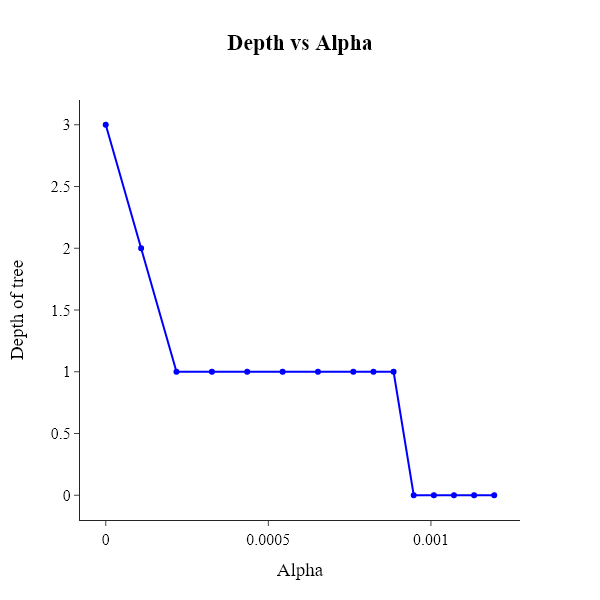

In [15]:
CV.compare_depth_and_alpha(X=X_train, y=y_train)

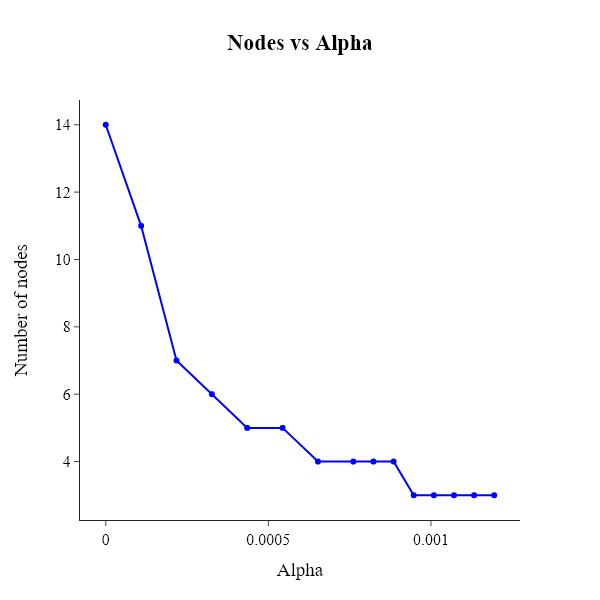

In [16]:
CV.compare_nodes_and_alpha(X=X_train, y=y_train)

$\text{Now let's find out using cross validation what are mean train and valid scores for different values of } ccp\_alpha$

ccp_alpha=0.0: train scores: 0.93411; valid scores: 0.91434
ccp_alpha=0.00011: train scores: 0.92885; valid scores: 0.91224
ccp_alpha=0.00022: train scores: 0.91903; valid scores: 0.90703
ccp_alpha=0.00033: train scores: 0.91386; valid scores: 0.90367
ccp_alpha=0.00044: train scores: 0.91021; valid scores: 0.90155
ccp_alpha=0.00054: train scores: 0.90834; valid scores: 0.90064
ccp_alpha=0.00065: train scores: 0.90594; valid scores: 0.8988
ccp_alpha=0.00076: train scores: 0.90338; valid scores: 0.89657
ccp_alpha=0.00082: train scores: 0.90315; valid scores: 0.89666
ccp_alpha=0.00089: train scores: 0.90114; valid scores: 0.89482
ccp_alpha=0.00095: train scores: 0.90028; valid scores: 0.89445
ccp_alpha=0.00101: train scores: 0.89962; valid scores: 0.8929
ccp_alpha=0.00107: train scores: 0.89909; valid scores: 0.89226
ccp_alpha=0.00113: train scores: 0.89828; valid scores: 0.89193
ccp_alpha=0.00119: train scores: 0.89713; valid scores: 0.89085


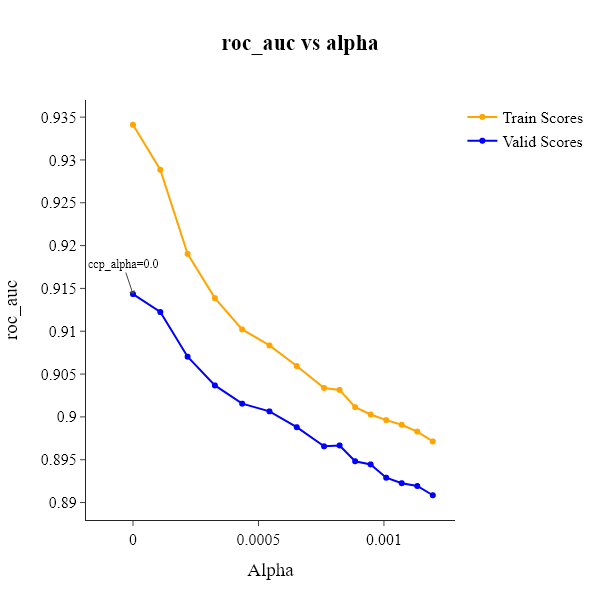

In [17]:
CV.compare_scores_and_alpha(X=X_train, y=y_train, verbose=True)

$\text{We can see that the best value for valid score is obtained for } ccp\_alpha\approx0.0$<p>
$\text{Right now we can take a closer look for range: } [0.0, 0.003]$

ccp_alpha=0.0: train scores: 0.93411; valid scores: 0.91434
ccp_alpha=0.00076: train scores: 0.90338; valid scores: 0.89657
ccp_alpha=0.00119: train scores: 0.89713; valid scores: 0.89085


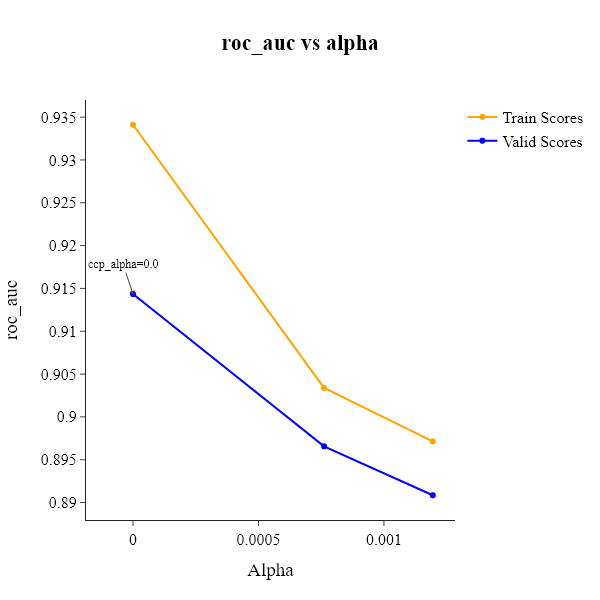

In [18]:
CV.cv_for_range_of_alpha(X=X_train, y=y_train, min_alpha=0.00, max_alpha=0.003, verbose=True)

$\text{Best valid score was obtained for } ccp\_alpha=0.0$<p>

<h1>Evaluation and Visualization<h1>

In [19]:
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=base_predictions), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=base_probabilities), 5)))
report = classification_report(y_test, base_predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.85055
Roc AUC score: 0.91933
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0.0          |    0.861917 | 0.847018 |   0.854403 | 1157        |
| 1.0          |    0.838504 | 0.854089 |   0.846225 | 1076        |
| accuracy     |    0.850425 | 0.850425 |   0.850425 |    0.850425 |
| macro avg    |    0.85021  | 0.850554 |   0.850314 | 2233        |
| weighted avg |    0.850635 | 0.850425 |   0.850462 | 2233        |
+--------------+-------------+----------+------------+-------------+


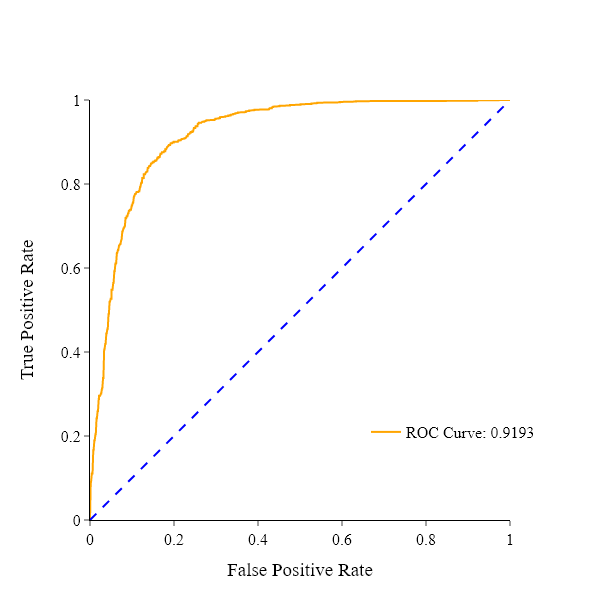

In [20]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=base_probabilities)

$\text{Final estimator pre pruning: } n\_estimators=500, \ learning\_rate_=0.14, \ subsample=0.93$

In [21]:
final_algorithm_pre_pruning = GradientBoostingClassifier(random_state=17, n_estimators=500, learning_rate=0.14, subsample=0.93)
final_algorithm_pre_pruning.fit(X_train, np.array(y_train).squeeze())
y_pred_final_pre_pruning = final_algorithm_pre_pruning.predict(X_test)
y_prob_final_pre_pruning = final_algorithm_pre_pruning.predict_proba(X_test)[:, 1]
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_final_pre_pruning), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob_final_pre_pruning), 5)))
report = classification_report(y_test, y_pred_final_pre_pruning, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.85989
Roc AUC score: 0.92761
+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
|--------------+-------------+----------+------------+------------|
| 0.0          |    0.869527 | 0.858254 |   0.863854 | 1157       |
| 1.0          |    0.849679 | 0.861524 |   0.855561 | 1076       |
| accuracy     |    0.85983  | 0.85983  |   0.85983  |    0.85983 |
| macro avg    |    0.859603 | 0.859889 |   0.859707 | 2233       |
| weighted avg |    0.859963 | 0.85983  |   0.859858 | 2233       |
+--------------+-------------+----------+------------+------------+


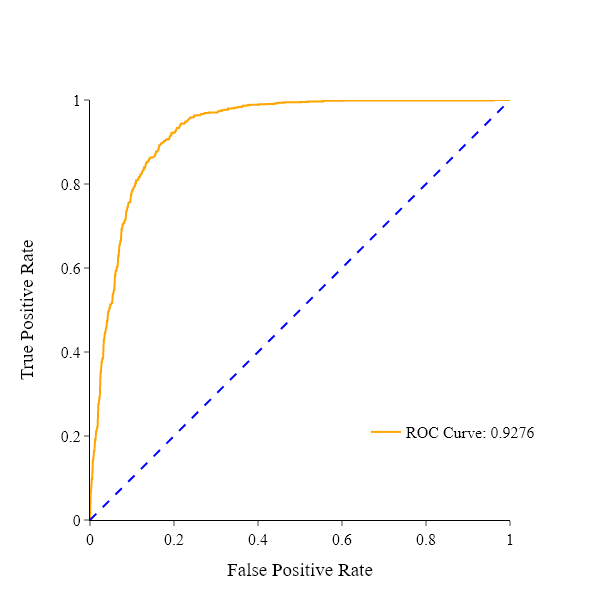

In [22]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=y_prob_final_pre_pruning)

$\text{Final estimator post pruning: } ccp\_alpha=0.00121$

In [23]:
final_algorithm_post_pruning = GradientBoostingClassifier(random_state=17, ccp_alpha=0.0)
final_algorithm_post_pruning.fit(X_train, np.array(y_train).squeeze())
y_pred_final_post_pruning = final_algorithm_post_pruning.predict(X_test)
y_prob_final_post_pruning = final_algorithm_post_pruning.predict_proba(X_test)[:, 1]
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_final_post_pruning), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob_final_post_pruning), 5)))
report = classification_report(y_test, y_pred_final_post_pruning, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.84623
Roc AUC score: 0.91697
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0.0          |    0.860692 | 0.838375 |   0.849387 | 1157        |
| 1.0          |    0.830922 | 0.854089 |   0.842346 | 1076        |
| accuracy     |    0.845947 | 0.845947 |   0.845947 |    0.845947 |
| macro avg    |    0.845807 | 0.846232 |   0.845867 | 2233        |
| weighted avg |    0.846347 | 0.845947 |   0.845994 | 2233        |
+--------------+-------------+----------+------------+-------------+


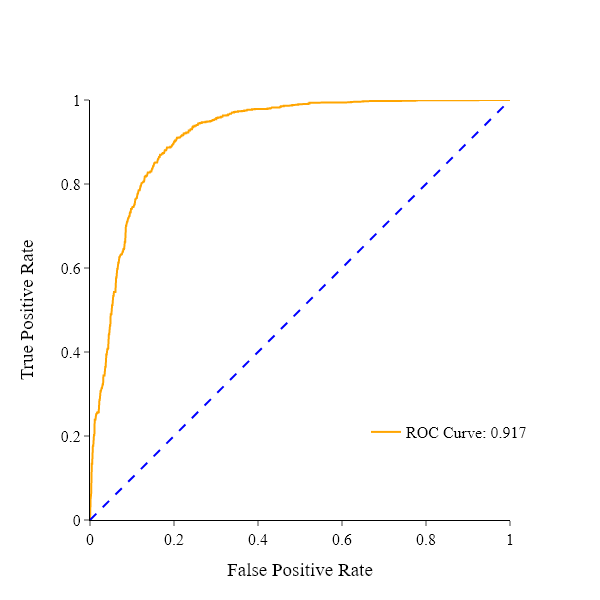

In [24]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=y_prob_final_post_pruning)

$\text{As we can see hyperparameter tuning for pre pruning have improved the effectiveness of the Gradient Boosting!}$

<h2>Gradient Boosting Regressor<h2>

$\text{Loss Function:}$<p>
$\text{The most popular Gradient Boosting Loss function is:}$
$$Loss\left(y,\hat{y}\right)=\frac{1}{2}\times\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)^2$$
$\text{Another populare loss function for regression is } squared\_error:$
$$squared\_error=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)^2$$
$\text{Initial value:}$
$$\frac{\partial Loss\left(y,pred\right)}{\partial pred}=\frac{1}{2\times N}\times\sum_{i=1}^{N}\left(-2\times y_i+2\times p r e d\right)=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-pred\right)=0$$
$$\sum_{i=1}^{N}y_i-pred\times N=0\rightarrow pred=\bar{y}$$
$$\frac{\partial squared\_error\left(y,pred\right)}{\partial pred}=\frac{1}{N}\times\sum_{i=1}^{N}{(-2\times y_i+2\times p r e d)}=-\frac{2}{N}\times\sum_{i=1}^{N}\left(y_i-pred\right)=0$$
$$\sum_{i=1}^{N}y_i-pred\times N=0\rightarrow pred=\bar{y}$$
$$Estimator_0\left(X\right)=\bar{y}$$
$\text{Error of estimator:}$
$$\varepsilon_{t,i}=-\left[\frac{\partial Loss\left(y_i,{\hat{y}}_i\right)}{\partial{\hat{y}}_i}\right]=y_i-{\hat{y}}_i$$
$$\varepsilon_{t,i}=-\left[\frac{\partial squared\_error\left(y_i,{\hat{y}}_i\right)}{\partial{\hat{y}}_i}\right]=2\times(y_i-{\hat{y}}_i)$$
$\gamma \text{ value:}$
$$Loss\left(y,\hat{y}+\gamma\right)=\frac{1}{2\times N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i-\gamma\right)^2$$
$$\frac{\partial Loss\left(y,\hat{y}+\gamma\right)}{\partial\gamma}=\frac{1}{2\times N}\times\sum_{i=1}^{N}\left(2\times\gamma-2\times y_i-2\times{\hat{y}}_i\right)=\frac{1}{N}\times\sum_{i=1}^{N}\left(\gamma-y_i+{\hat{y}}_i\right)=0$$
$$N\times\gamma=\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)\rightarrow\gamma=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)$$
$$squared\_error\left(y,\hat{y}+\gamma\right)=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i-\gamma\right)^2$$
$$\frac{\partial Loss\left(y,\hat{y}+\gamma\right)}{\partial\gamma}=\frac{1}{N}\times\sum_{i=1}^{N}\left(2\times\gamma-2\times y_i-2\times{\hat{y}}_i\right)=\frac{2}{N}\times\sum_{i=1}^{N}\left(\gamma-y_i+{\hat{y}}_i\right)=0$$
$$2\times N\times\gamma=2\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)\rightarrow\gamma=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)$$
$\text{Due to the lack of differentiability of the } abosulute\_error \text{ function, it will be necessary to use more advanced algorithms, such as bfgs.}$<p>

<h2>Prediction<h2>

$$Prediction=Estimator_0\left(X\right)+\sum_{i=1}^{N}\left(learning\_rate\times{Estimator}_t\left(X\right)\right)$$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [25]:
data = pd.read_csv("Data/Sales.csv")
X = data.drop("Sales", axis=1)
y = data["Sales"]

In [26]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 4572


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<h2>Check for null data<h2>

In [27]:
data.isnull().sum()/len(data)

TV              0.002187
Radio           0.000875
Social Media    0.001312
Influencer      0.000000
Sales           0.001312
dtype: float64

In [28]:
data.dropna(inplace=True)

<h2>Convert object to numeric<h2>

In [29]:
list_of_object_features = data.select_dtypes(include="object").columns.tolist()
list_of_numeric_features = data.select_dtypes(exclude="object").columns.tolist()
encoder = OrdinalEncoder()
data[list_of_object_features] = encoder.fit_transform(data[list_of_object_features])

<h2>Divide our data into train and test sets<h2>

In [30]:
target_binary = "Sales"
X = data.drop(target_binary, axis=1)
y = data[[target_binary]]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

<h1>Evaluation and Visualization<h1>

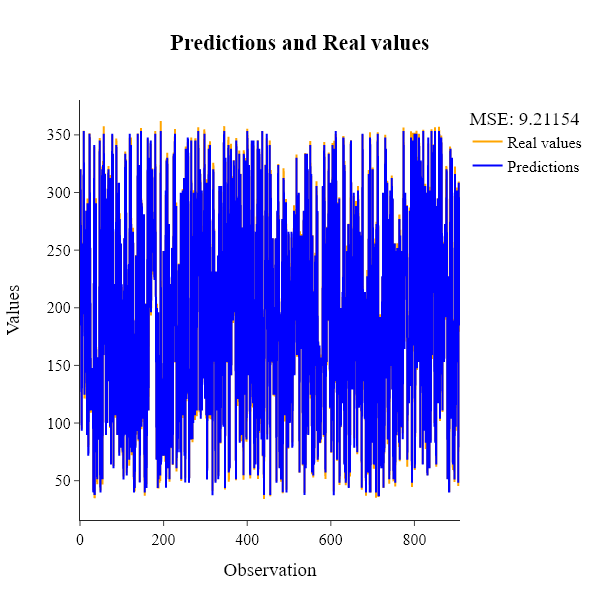

In [31]:
model = Gradient_Boosting_Regressor(n_estimators=50, learning_rate=0.1, loss="squared_error", max_depth=3, random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Plots_predictions.compare_predictions_with_real_values(y_true=y_test, y_pred=y_pred, metric="MSE")

<h2>Features importance<h2>

$\text{As with the random forest, the significance of the variables will be based on the estimators from which Ensemble was built.}$<p>
$$feature\_importnace_m=\frac{\sum_{t\in n u m b e r\ of\ trees}{feature\_importnace}_{m,t}}{number\ of\ trees}$$

$\text{Where: number of trees - the number of all trees in the forest,}$<p>
${feature\_importnace}_{m,t} \text{ - the importance of variable } m \text{ for tree } t.$

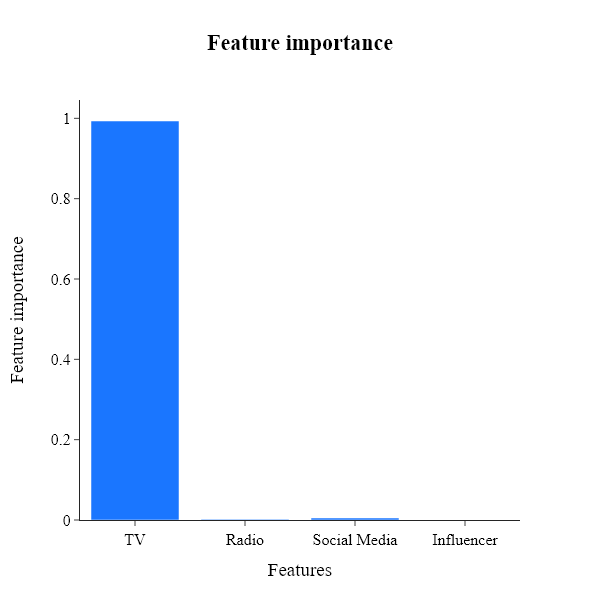

In [32]:
Plots_predictions.plot_feature_importances(feature_importances=list(model.normalized_feature_importances.values()), column_names=X.columns.tolist())